In [8]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt

[[-1 -1 -1 ... -1 -1 -1]
 [-1  0  0 ...  0  0 -1]
 [-1  0  0 ...  0  0 -1]
 ...
 [-1  0  0 ...  0  0 -1]
 [-1  0  0 ...  0  0 -1]
 [-1 -1 -1 ... -1 -1 -1]]


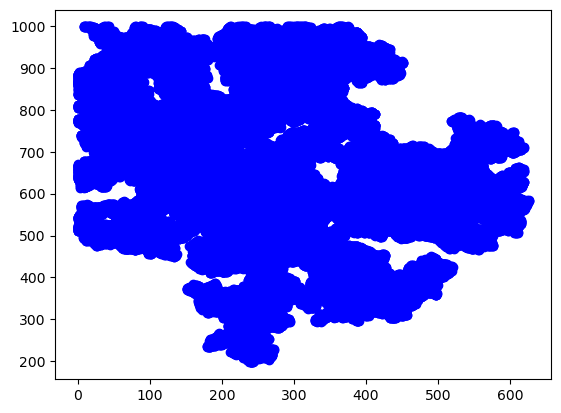

In [14]:
L = 1000
p =0.59275

def HLA(L,p):
    N = L*L
    site = np.zeros((L+2,L+2),dtype = np.short)
    # -1 significa sitio vacio, 0 sitio por preguntar, 1 sitio lleno, 2 perimetro
    perx = np.array([],dtype = int)
    pery = np.array([],dtype = int)

    #Las paredes dentro de site
    for i in range(0,L+2): #bordes
        site[0,i] = -1
        site[i,0] = -1
        site[L+1,i] = -1
        site[i,L+1] = -1

    #desplazamiento a vecinos
    nx = np.array([1,0,-1,0])
    ny = np.array([0,1,0,-1])

    #Sitio inicial
    xseed = L//2
    yseed = L//2
    site[yseed,xseed] = 1
    xCluster = np.array([xseed])
    yCluster = np.array([yseed])
    Ncluster = 1   #numero de sitios pertenecientes al cluster

#Generación del primer perimetro
    for i in range(4):
        newperx = xseed + nx[i]
        newpery = yseed + ny[i]
        perx = np.append(perx,newperx)
        pery = np.append(pery,newpery)
        site[newperx,newpery] = 2

    Nper = 4 #numero de elementos del perimetro

    while Nper>0:
        indice = nr.randint(Nper)
        xnew = perx[indice]
        ynew = pery[indice]
        perx = np.delete(perx,indice)
        pery = np.delete(pery,indice)
        Nper -= 1

        escoger=np.random.random()
        if escoger < p:
            site[xnew,ynew]=1
            xCluster=np.append(xCluster,xnew)
            yCluster=np.append(yCluster,ynew)
            for i in range(4):
                newperx = xnew + nx[i]
                newpery = ynew + ny[i]
                if site[newperx,newpery]==0:
                    perx = np.append(perx,newperx)
                    pery = np.append(pery,newpery)
                    site[newperx,newpery] = 2
                    Nper +=1
        else:
            site[xnew,ynew]=-1
    print(site)
    return xCluster-1,yCluster-1
xCluster, yCluster=HLA(L,p)
fig, ax = plt.subplots()
ax.plot(xCluster, yCluster, 'bo')
plt.show()